<a href="https://colab.research.google.com/github/njafarov/Optimization_LP/blob/main/Challenge7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 6.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Pr

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

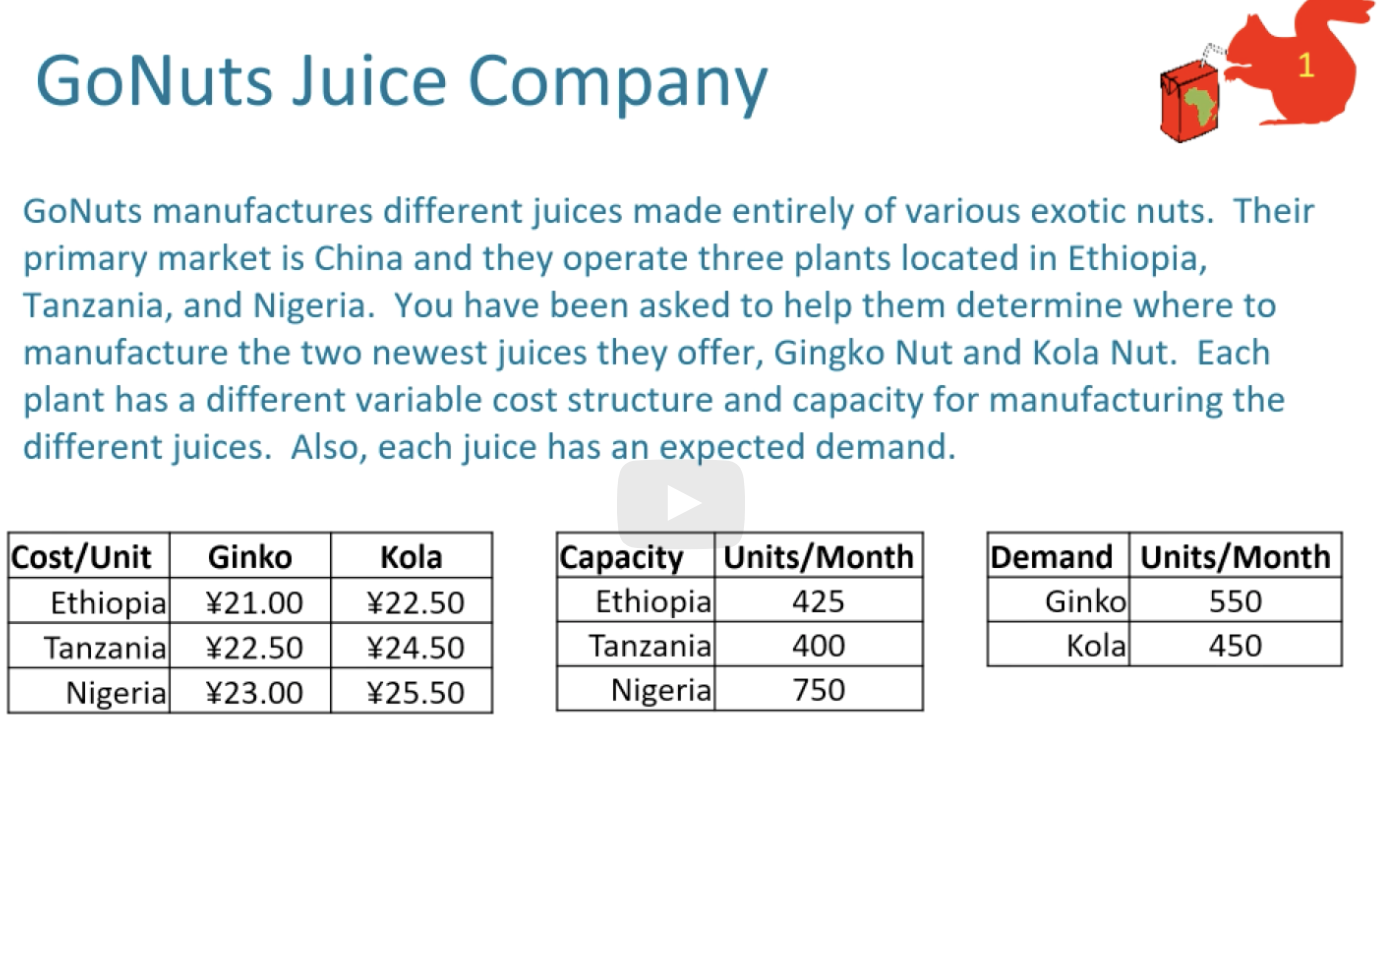

In [19]:
# Define the model
model = pyo.ConcreteModel()

model.i = pyo.Set(initialize=["Ethiopia","Tanzania","Kenia"])
model.j = pyo.Set(initialize=["Ginko","Kola"])


model.C = pyo.Param(model.i, model.j, initialize={("Ethiopia","Ginko"):21,("Ethiopia","Kola"):22.5,
                                                  ("Tanzania","Ginko"):22.5,("Tanzania","Kola"):24.5,
                                                  ("Kenia","Ginko"):23,("Kenia","Kola"):25.5})
C = model.C

model.S = pyo.Param(model.i, initialize={"Ethiopia":425,"Tanzania":400,"Kenia":750})
S = model.S

model.D = pyo.Param(model.j, initialize={"Ginko":550,"Kola":450})
D = model.D

# Decision Variables
model.x = pyo.Var(model.i, model.j, domain=pyo.NonNegativeReals)
x = model.x

# Objective Function
def objective_function(model):
  return sum(sum(x[i,j]*C[i,j] for i in model.i) for j in model.j)
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.minimize)

# Constrains

def cons1(model,i):
  return sum(x[i,j] for j in model.j)<=S[i]
model.cons1 = pyo.Constraint(model.i, rule=cons1)


def cons2(model,j):
  return sum(x[i,j] for i in model.i)>=D[j]
model.cons2 = pyo.Constraint(model.j, rule=cons2)

def cons3(model,i,j):
  return x[i,j] >=0
model.cons3 = pyo.Constraint(model.i, model.j, rule=cons3)

# Optimization
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  for j in model.j:
    print("From plant ", i, x[i,j](), "amount of product", j, " produced " )


Problem: 
- Name: unknown
  Lower bound: 22637.5
  Upper bound: 22637.5
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 7
  Number of nonzeros: 19
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.015362977981567383
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  22637.5
From plant  Ethiopia 0.0 amount of product Ginko  produced 
From plant  Ethiopia 425.0 amount of product Kola  produced 
From plant  Tanzania 375.0 amount of product Ginko  produced 
From plant  Tanzania 25.0 amount of product Kola  produced 
From plant  Kenia 175.0 amount of product Ginko  produced 
From plant  Kenia 0.0 amount of product Kola  produced 
